# Principal Component Analysis (PCA) — Motivation and Math

## Motivation

PCA helps reduce dimensionality and find structure in high-dimensional data. In finance, this might mean identifying dominant patterns in stock returns or risk factors driving asset prices.

- Original data: correlated asset returns (e.g., 100 stocks)
- Goal: decorrelate the data and reduce noise
- PCA finds **orthogonal directions** (principal components) that explain the most variance in the data

## Mathematical Setup

Given a data matrix $X \in \mathbb{R}^{n \times p}$ with $n$ observations and $p$ variables (e.g., stock returns), we assume the data is centered:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i = 0
$$

Compute the **sample covariance matrix**:

$$
\Sigma = \frac{1}{n} X^\top X
$$

Then compute the **eigendecomposition**:

$$
\Sigma = Q \Lambda Q^\top
$$

- $Q$: matrix of eigenvectors (principal directions)
- $\Lambda$: diagonal matrix of eigenvalues (variances along each direction)

The **principal components** are projections of the original data onto the eigenvectors:

$$
Z = X Q
$$

- Each column of $Z$ is an uncorrelated time series (principal component)
- The first few components usually explain most of the variance in the original data


In [25]:
import yfinance as yf
import pandas as pd

tickers = [
    "JPM",   # JPMorgan Chase - Financials
    "AAPL",  # Apple - Technology
    "XOM",   # ExxonMobil - Energy
    "PFE",   # Pfizer - Health Care
    "AMZN",  # Amazon - Consumer Discretionary
    "KO",    # Coca-Cola - Consumer Staples
    "BA",    # Boeing - Industrials
    "NEE",   # NextEra Energy - Utilities
    "PLD",   # Prologis - Real Estate
    "SPY"    # S&P 500 ETF as broad market proxy
]

# Download historical prices
data = yf.download(tickers, start="2021-01-01", end="2023-12-31")['Close']

# Drop missing data
data = data.dropna()

# Log returns
returns = data.pct_change().dropna()

# Inspect data
returns.head()


/tmp/ipython-input-25-3833142575.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2021-01-01", end="2023-12-31")['Close']
[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,BA,JPM,KO,NEE,PFE,PLD,SPY,XOM
Date,,,,,,,,,,
2021-01-05,0.012364,0.010004,0.043952,0.005441,-0.010993,0.007410,0.010323,0.001562,0.006887,0.048193
2021-01-06,-0.033662,-0.024897,-0.002835,0.046956,-0.031813,0.048950,-0.008605,-0.023703,0.005979,0.025517
2021-01-07,0.034123,0.007577,0.007961,0.032840,-0.011085,0.010965,0.005153,0.015014,0.014857,0.007846
2021-01-08,0.008631,0.006496,-0.013211,0.001104,0.022418,0.023206,0.001889,0.013429,0.005698,0.011121
2021-01-11,-0.023249,-0.021519,-0.014817,0.014924,-0.017228,-0.017749,0.017237,-0.020083,-0.006741,0.030357


## Principal Component Analysis (PCA) – Math and Intuition

PCA is a technique used to reduce the dimensionality of a dataset while retaining the most important variance directions.

### Step-by-Step

**1. Start with a data matrix**  
Let $X$ be an $n \times p$ matrix of mean-centered returns:  
- $n$ = number of time periods (rows)  
- $p$ = number of assets (columns)

$$
X =
\begin{bmatrix}
\vdots & \vdots & \vdots \\\\
x_{11} & x_{12} & \dots & x_{1p} \\\\
\vdots & \vdots & \vdots \\\\
x_{n1} & x_{n2} & \dots & x_{np} \\\\
\vdots & \vdots & \vdots \\
\end{bmatrix}
$$

**2. Compute the sample covariance matrix**  
$$
\Sigma = \frac{1}{n - 1} X^\top X
$$

**3. Eigen decomposition of the covariance matrix**  
$$
\Sigma = V \Lambda V^\top
$$  
- $V$: matrix of eigenvectors (principal components)  
- $\Lambda$: diagonal matrix of eigenvalues (explained variances)

Each eigenvector $v_k$ points in the direction of maximum variance under the constraint of orthogonality to the others.

**4. Transform the data**  
Project the data onto the eigenvectors:

$$
Z = X V
$$

- Each column of $Z$ is a principal component time series.  
- The first column explains the most variance, the second explains the next most, and so on.

**5. Explained Variance**  
Each eigenvalue $\lambda_k$ gives the variance explained by component $k$:

$$
\text{Proportion of variance explained} = \frac{\lambda_k}{\sum_{j=1}^{p} \lambda_j}
$$

This helps you decide how many components to keep.



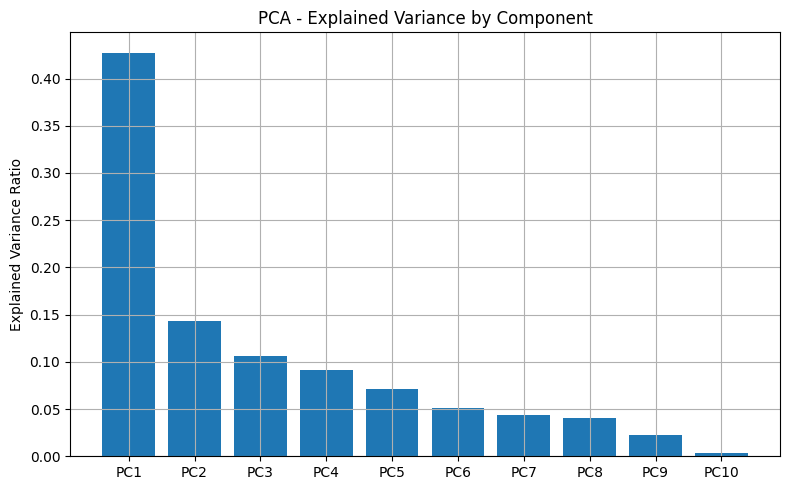

                 PC1       PC2       PC3       PC4       PC5       PC6  \
Date                                                                     
2021-01-05  0.044133  0.042452 -0.002776  0.010589 -0.000426 -0.021632   
2021-01-06 -0.009209  0.038351  0.026058 -0.000161 -0.028305 -0.007702   
2021-01-07  0.039837 -0.000217  0.008466  0.004726  0.000262  0.023740   
2021-01-08  0.016462 -0.013661  0.024735  0.006608 -0.016222 -0.001597   
2021-01-11 -0.030863  0.033352  0.012093  0.030116  0.014884 -0.003073   

                 PC7       PC8       PC9      PC10  
Date                                                
2021-01-05  0.008008  0.007647 -0.013380 -0.002132  
2021-01-06 -0.017523 -0.060882 -0.037718  0.011963  
2021-01-07  0.010551 -0.008587 -0.023715 -0.000959  
2021-01-08  0.001975 -0.002752  0.014613 -0.001871  
2021-01-11 -0.008645 -0.010104 -0.013913  0.001926  


In [26]:
# Fit PCA on returns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca_fit = pca.fit(returns)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Transform returns into principal components
components = pca.transform(returns)
pca_df = pd.DataFrame(components, index=returns.index, columns=[f'PC{i+1}' for i in range(components.shape[1])])

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, tick_label=[f'PC{i+1}' for i in range(len(explained_variance))])
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance by Component')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally inspect component time series
print(pca_df.head())

### 🧮 PCA Implementation Explained (Line by Line)

**pca = PCA()**

Initializes the PCA object. No number of components is specified, so it keeps all components.

**pca.fit(returns)**

Fits the PCA model to the return matrix.

- Internally:
  - Centers the return data (subtracts the mean of each column)
  - Computes the sample covariance matrix
  - Performs eigen-decomposition:
    $$
    \Sigma = V \Lambda V^\top
    $$
  - Where:
    - $\Sigma$ is the covariance matrix of returns
    - $V$ contains the eigenvectors (principal directions)
    - $\Lambda$ is a diagonal matrix of eigenvalues (variance explained)

---

**components = pca.components_**

This returns the **eigenvectors** (principal components).

- Shape: $k \times n$ (where $k$ = number of components, $n$ = number of assets)
- Each row is a direction in asset space (a portfolio) that explains the most remaining variance.

---

**explained_var = pca.explained_variance_**

These are the **eigenvalues** of the covariance matrix.

- Each value tells you how much variance is explained by the corresponding principal component:
  $$
  \lambda_1, \lambda_2, \dots, \lambda_k
  $$

---

**explained_ratio = pca.explained_variance_ratio_**

This is the **proportion** of total variance explained by each component:
$$
\frac{\lambda_i}{\sum_j \lambda_j}
$$

- Useful for seeing how many components explain most of the variability in the data.

---

**scores = pca.transform(returns)**

These are the **coordinates** of each observation (day) in the new component space.

- Also called the **principal component scores**
- Each row is a day, each column is the value of a component on that day:
  $$
  Z = R \cdot V^\top
  $$


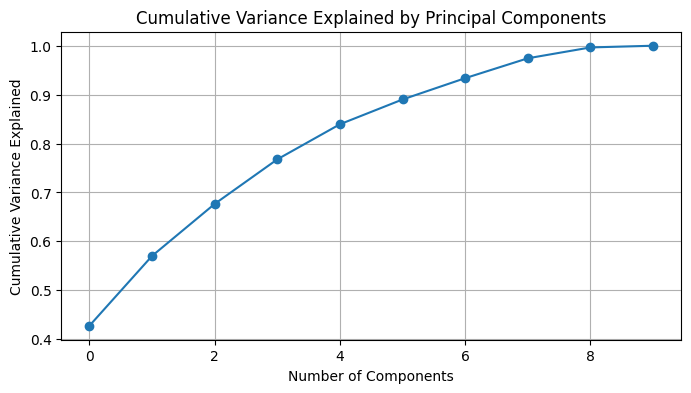

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title("Cumulative Variance Explained by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.show()


In [28]:
# Loadings = component weights
loadings_df = pd.DataFrame(pca.components_, columns=returns.columns)

# Top weights for PC1
print(loadings_df.iloc[0].sort_values(ascending=False))

# Top weights for PC1
print(loadings_df.iloc[1].sort_values(ascending=False))


Ticker
AMZN    0.497984
BA      0.468463
AAPL    0.371360
PLD     0.325659
SPY     0.284732
JPM     0.259159
NEE     0.254464
XOM     0.206138
KO      0.134536
PFE     0.122524
Name: 0, dtype: float64
Ticker
XOM     0.571235
BA      0.541465
JPM     0.231175
KO     -0.028123
SPY    -0.037257
PFE    -0.041639
NEE    -0.172755
PLD    -0.178790
AAPL   -0.206979
AMZN   -0.467442
Name: 1, dtype: float64


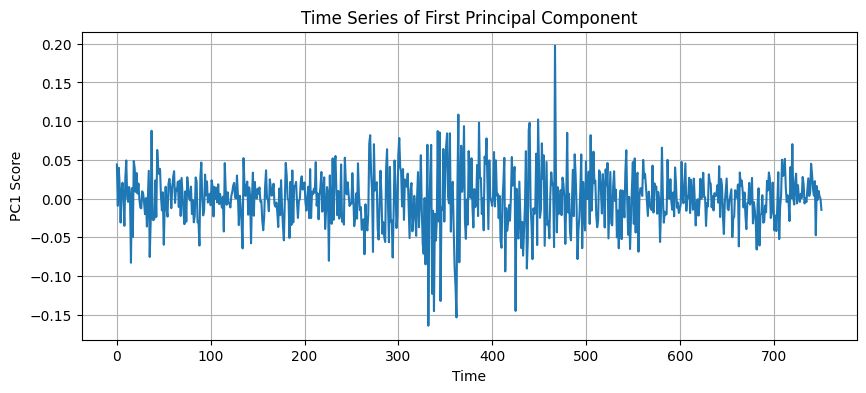

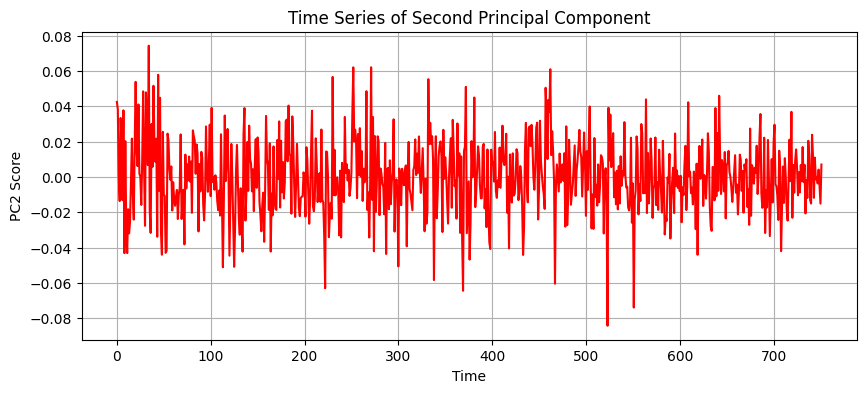

In [29]:
# Plot the first principal component over time
plt.figure(figsize=(10, 4))
plt.plot(components[:, 0])
plt.title("Time Series of First Principal Component")
plt.xlabel("Time")
plt.ylabel("PC1 Score")
plt.grid(True)
plt.show()

# Plot the second principal component over time
plt.figure(figsize=(10, 4))
plt.plot(components[:, 1],c  = 'red')
plt.title("Time Series of Second Principal Component")
plt.xlabel("Time")
plt.ylabel("PC2 Score")
plt.grid(True)
plt.show()



## Updated PC2 Loadings Interpretation with Individual Stocks

The second principal component (PC2) loadings for selected individual stocks are:

$$
\begin{aligned}
& \text{XOM (Energy)}: +0.571 \\
& \text{BA (Industrials)}: +0.541 \\
& \text{JPM (Financials)}: +0.231 \\
& \text{KO (Consumer Staples)}: -0.028 \\
& \text{SPY (Market Proxy)}: -0.037 \\
& \text{PFE (Health Care)}: -0.042 \\
& \text{NEE (Utilities)}: -0.173 \\
& \text{PLD (Real Estate)}: -0.179 \\
& \text{AAPL (Technology)}: -0.207 \\
& \text{AMZN (Consumer Discretionary)}: -0.467 \\
\end{aligned}
$$

Interpretation:

- PC2 clearly distinguishes **Energy (XOM), Industrials (BA), and Financials (JPM)** with strong positive loadings.
- Negative loadings on **Technology (AAPL), Consumer Discretionary (AMZN), Utilities (NEE), and Real Estate (PLD)** suggest an opposing behavior.
- This factor appears to capture a rotation between cyclicals (energy, industrials, financials) and defensives or growth stocks (tech, consumer discretionary).
- The presence of SPY near zero implies this is a sector rotation factor orthogonal to the broad market movement.

This refined set of stocks gives a stronger and more interpretable economic signal in PC2 compared to broad ETFs.


/tmp/ipython-input-32-1037161315.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  copper = yf.download('HG=F', start=returns.index[0], end=returns.index[-1])['Close'].fillna(method='ffill')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-32-1037161315.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  copper = yf.download('HG=F', start=returns.index[0], end=returns.index[-1])['Close'].fillna(method='ffill')
/tmp/ipython-input-32-1037161315.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tnx = yf.download('^TNX', start=returns.index[0], end=returns.index[-1])['Close'].fillna(method='ffill')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-32-1037161315.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

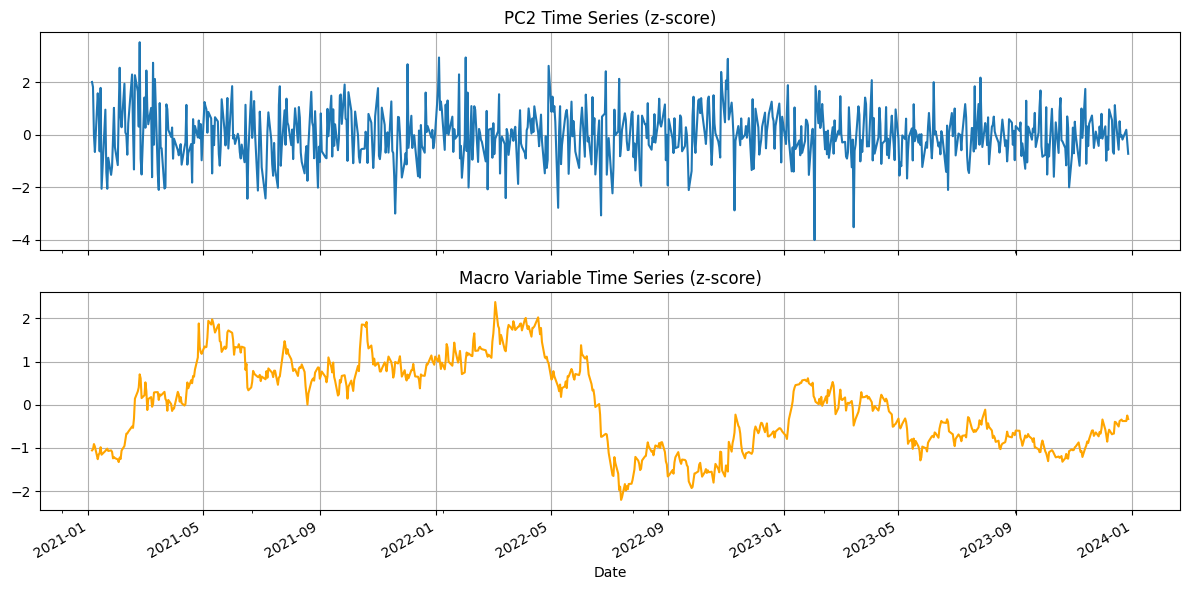

In [32]:
import yfinance as yf
import matplotlib.pyplot as plt


# Example: Download Copper futures ('HG=F')
copper = yf.download('HG=F', start=returns.index[0], end=returns.index[-1])['Close'].fillna(method='ffill')

# Or Example: Download 10-year Treasury yield proxy using '^TNX' (Yahoo Finance symbol for CBOE 10-year yield)
tnx = yf.download('^TNX', start=returns.index[0], end=returns.index[-1])['Close'].fillna(method='ffill')

# Choose your macro variable here:
macro_var = copper

# Normalize PC2 and chosen macro variable
pc2_norm = (pca_df['PC2'] - pca_df['PC2'].mean()) / pca_df['PC2'].std()
macro_norm = (macro_var - macro_var.mean()) / macro_var.std()

# Align indices
combined = pd.concat([pc2_norm, macro_norm], axis=1).dropna()
combined.columns = ['PC2 (z-score)', 'Macro Variable (z-score)']

# Plot on shared figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

combined['PC2 (z-score)'].plot(ax=ax1)
ax1.set_title('PC2 Time Series (z-score)')
ax1.grid(True)

combined['Macro Variable (z-score)'].plot(ax=ax2, color='orange')
ax2.set_title('Macro Variable Time Series (z-score)')
ax2.grid(True)

plt.tight_layout()
plt.show()
